In [1]:
from dbanalysis.models import BRM
r = BRM.BRModel('15',1,mode='data',use_dummies=False)

Checking for data files
gathering data...
Preprocessing data
parsing routeids
dropping null values
adding distances
adding base departure times


/home/student/dbanalysis/dbanalysis/models/BRM.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  keys['base_time_dep']=keys['actualtime_arr_from']


adding time information
merging weather


In [3]:
r.data

,index,dayofservice,tripid,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,routeid,...,date,dewpt,msl,rain,rhum,temp,vappr,wetb,dt_y,planned_traveltime
1,1,03-JAN-17 00:00:00,4094338,79228,79228,79225,79241,79265,79272,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,27
2,2,03-JAN-17 00:00:00,4094338,79265,79265,79272,79272,79342,79364,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,64
3,3,03-JAN-17 00:00:00,4094338,79342,79342,79364,79364,79395,79410,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,141
4,4,03-JAN-17 00:00:00,4094338,79395,79395,79410,79427,79476,79494,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,194
5,5,03-JAN-17 00:00:00,4094338,79476,79476,79494,79507,79506,79532,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,275
6,6,03-JAN-17 00:00:00,4094338,79506,79506,79532,79532,79556,79565,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,305
7,7,03-JAN-17 00:00:00,4094338,79556,79556,79565,79603,79603,79629,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,355
8,8,03-JAN-17 00:00:00,4094338,79603,79603,79629,79629,79658,79668,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,402
9,9,03-JAN-17 00:00:00,4094338,79658,79658,79668,79682,79699,79722,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,457
10,10,03-JAN-17 00:00:00,4094338,79699,79699,79722,79722,79755,79743,15_16,...,2017-01-03,3.6,1029.1,0.0,90,5.1,7.9,4.5,2017-01-03 22:00:00,498


In [4]:
import seaborn as sns

In [4]:
r.data['speed'] = r.data['distance'] / (r.data['traveltime'] / 3600)

## Graph showing divergence in travel time in regards to distance

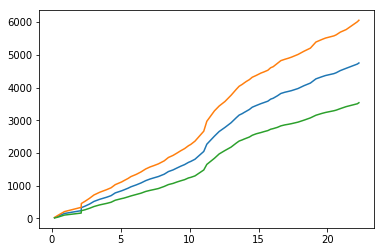

In [7]:
# mean traveltime in relation to distance:
distances = sorted(r.data['distance'].unique())
ds=[]
means=[]
upper_quantile = []
lower_quantile = []
for i in range(0, len(distances)-1):
    temp = r.data[(r.data['distance']>=distances[i]) & (r.data['distance']<distances[i+1])]
    ds.append(distances[i])
    means.append(temp['traveltime'].mean())
    upper_quantile.append(temp['traveltime'].quantile(0.95))
    lower_quantile.append(temp['traveltime'].quantile(0.05))
    
from matplotlib import pyplot as plt
plt.plot(ds,means)
plt.plot(ds,upper_quantile)
plt.plot(ds,lower_quantile)
plt.show()
    
    

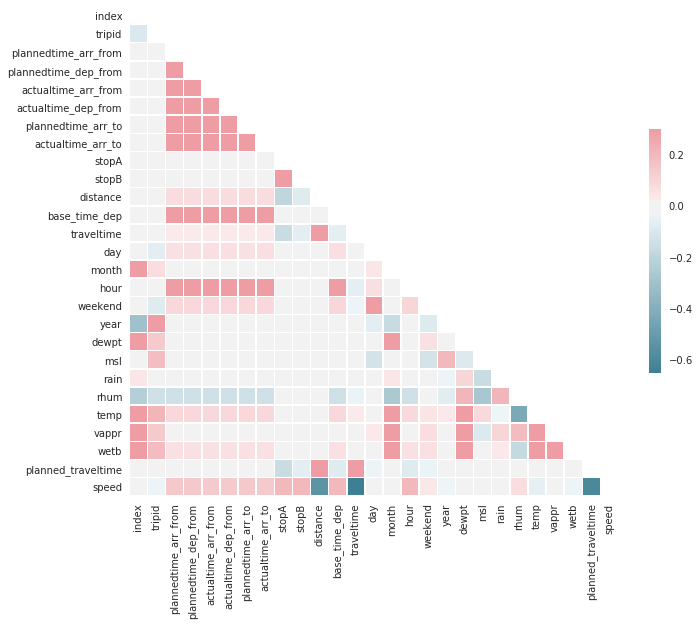

In [16]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#copied from tutorial

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)


# Compute the correlation matrix
corr = r.data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})